### What about the sociodemographic background

In notebook 6 we have seen that the sociodemographic background changes the chance of the paid salary. Lets check what our linear regression model says about that.

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms
import scipy.stats as stats

In [27]:
%store -r df


First we can take a look at the distribution of the salaries for female and male employees respectively.

In [28]:
fig = go.Figure()

mask = df['GENDER_DENOTING'] == 'Female'
fig.add_trace(
    go.Violin(x= df[mask]['GENDER_DENOTING'],
            y= df[ mask ]['SALARY'],
            name='Female',
            side='positive'
            )
)

mask = df['GENDER_DENOTING'] == 'Male'
fig.add_trace(
    go.Violin(x=df[mask]['GENDER_DENOTING'],
            y=df[ mask ]['SALARY'],
            name='Male',
            side='negative'
            )
    )
fig.update_traces(meanline_visible=True)
fig.update_layout(
    width=600,
    height=800,
    violingap=0, 
    violinmode='overlay',
    yaxis_title="Salary"
)
fig.show()

This plot shows the difference in salary distribution for the categorized gender. The mean and the range to the top is distinctively higher for male categorized employees.

<AxesSubplot:>

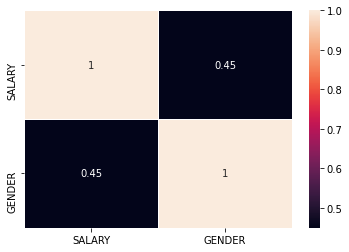

In [29]:
df = df[["SALARY", "GENDER"]]
sns.heatmap(df.corr(),annot=True,lw=1)

The correlation between salary and gender is nearly 0.5.

In [39]:
df_X = df.drop(columns = "SALARY")
Y = df["SALARY"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.4, random_state=17)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
predictions = model.predict(X_test)

In [43]:
mean_squared_error(y_test, predictions)**0.5

15114.461750511638

The RMSE here is nearly double as high as the RMSE calculated by taking in account all of the features.

In [44]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = predictions, 
        y = y_test - predictions,
        mode="markers"
    )
)
fig.update_layout(
    xaxis_title = "Predicted Salaries",
    yaxis_title = "Residuals"
)
fig.show()

Also the residuals show a more spreaded plot.

In [158]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x = y_test - predictions
    )
)
fig.update_layout(
    xaxis_title = "Residuals",
    yaxis_title = "Counts"
)
fig.show()

And the distribution of the residuals aint really normaly distributed. This shows also the following q-q plot.

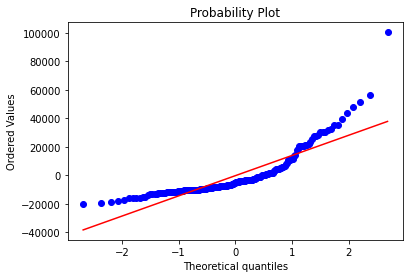

In [11]:
qq = stats.probplot(y_test-predictions, plot=plt)

In [159]:
X_train_sms = sms.add_constant(X_train)
ls=sms.OLS(y_train,X_train_sms).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     91.34
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           6.24e-19
Time:                        11:52:22   Log-Likelihood:                -3141.0
No. Observations:                 284   AIC:                             6286.
Df Residuals:                     282   BIC:                             6293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.531e+04   1328.693     19.046      0.0

And the R<sup>2</sup" also is not near to 0.5.ProcessLookupError

This means alltogether: The linear model does not give a good model for this data exploration on the realtion between gender and salary.

<AxesSubplot:xlabel='SOCIODEMOGRAPHY', ylabel='SALARY'>

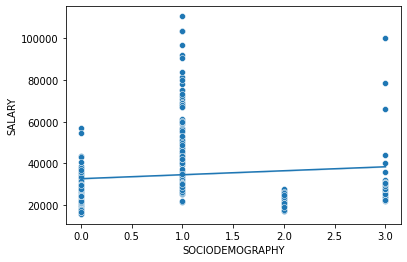

In [13]:
 mod = model.fit(X_train,y_train)
 
 sns.scatterplot(x = X_train["SOCIODEMOGRAPHY"], y = y_train)
 sns.lineplot(x = X_train["SOCIODEMOGRAPHY"], y = mod.intercept_ + X_train["SOCIODEMOGRAPHY"]*mod.coef_)

<AxesSubplot:xlabel='SOCIODEMOGRAPHY', ylabel='SALARY'>

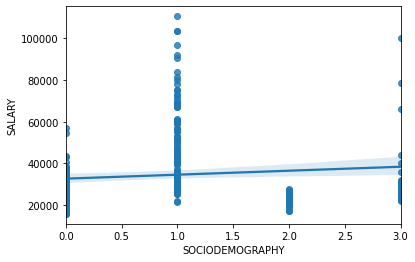

In [14]:
sns.regplot(y = y_train,x = X_train["SOCIODEMOGRAPHY"])

<AxesSubplot:ylabel='SALARY'>

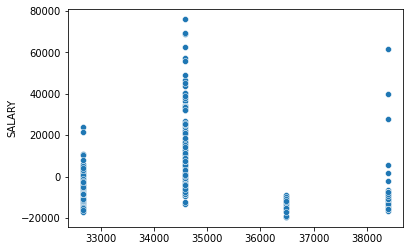

In [15]:
predictions = model.predict(X_train)
sns.scatterplot(x = predictions, y = y_train - predictions)

<AxesSubplot:xlabel='SOCIODEMOGRAPHY', ylabel='SALARY'>

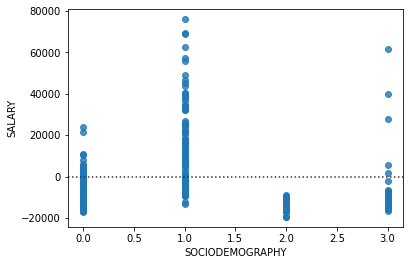

In [16]:
sns.residplot(x = X_train["SOCIODEMOGRAPHY"], y = y_train)